In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from  sklearn.tree  import  DecisionTreeClassifier 

In [2]:
df = pd.read_csv('C:/Program Files/Python37/1/CSV/stepik/iris.csv')

In [3]:
df

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


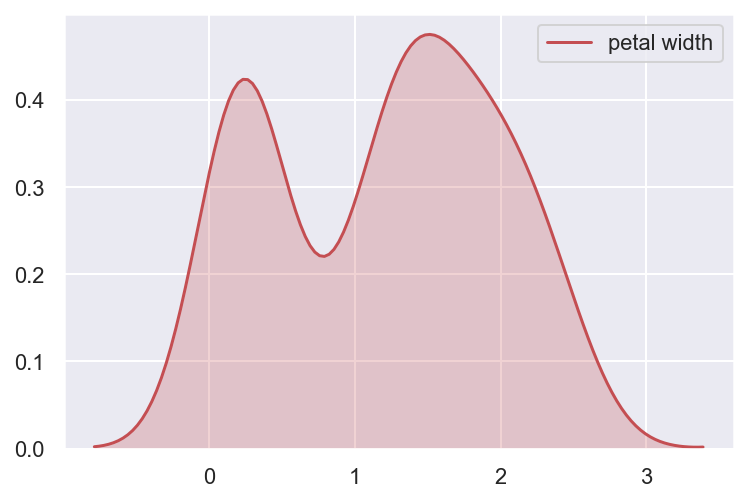

In [3]:
sns.kdeplot(shade=True, color="r", data=df['petal width'])

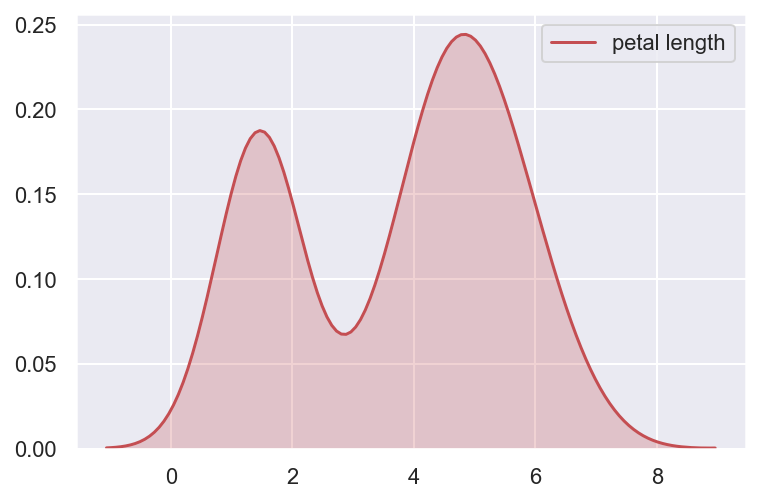

In [15]:
sns.kdeplot(shade=True, color="r", data=df['petal length'])

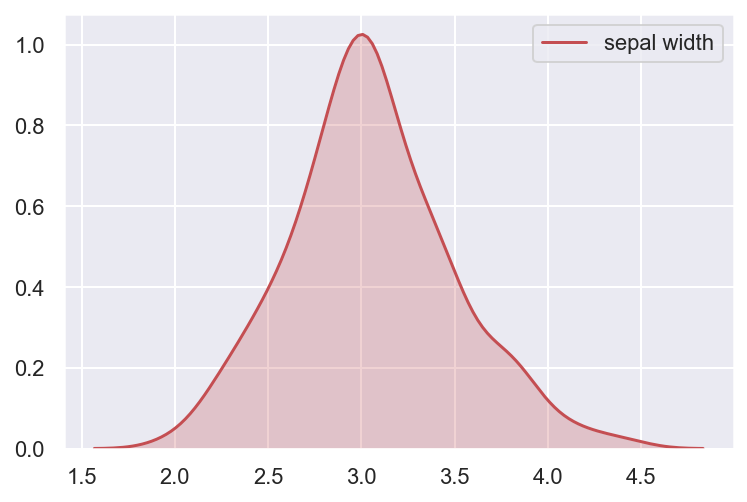

In [16]:
sns.kdeplot(shade=True, color="r", data=df['sepal width'])

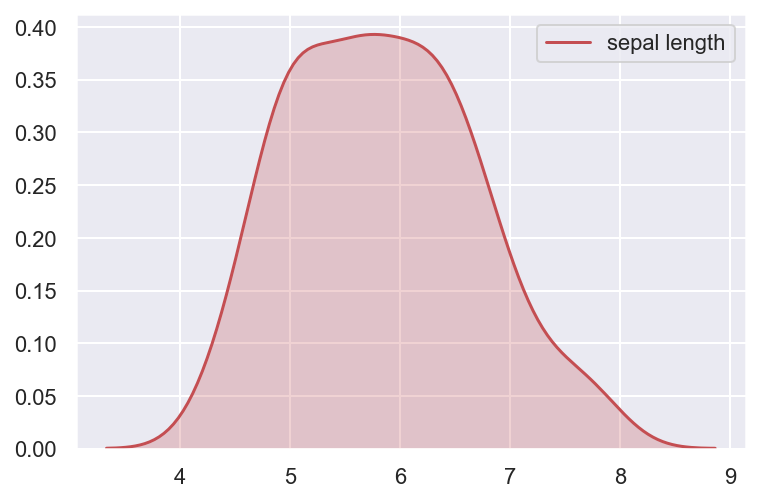

In [17]:
sns.kdeplot(shade=True, color="r", data=df['sepal length'])

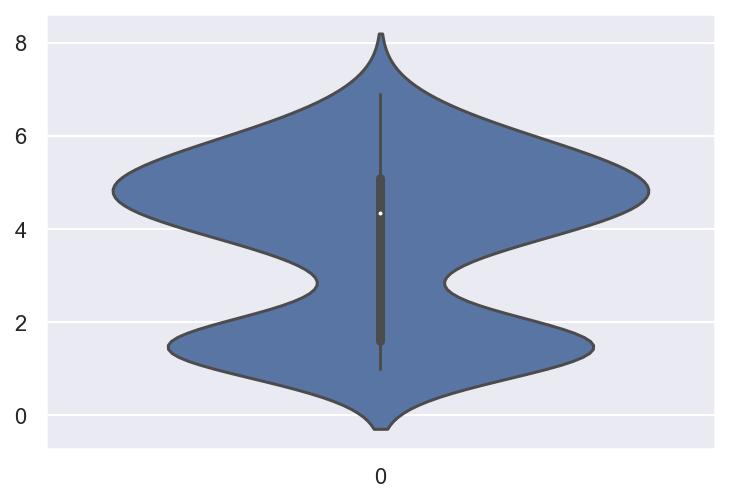

In [18]:
sns.violinplot(data=df['petal length'])

In [19]:
df.corr()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
Unnamed: 0,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
sepal length,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [21]:
df1 = pd.DataFrame({
    'type' : ['A', 'A', 'B', 'B'],
    'value' : [10, 14, 12, 23]
})

In [22]:
df1

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [16]:

my_stat = pd.read_csv('C:/Program Files/Python37/1/CSV/stepik/my_stat.csv')

In [5]:
df2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [15]:
subset_1 = df2.iloc[0:10,0:3:2]
subset_2 = df2.iloc[:,1:4:2]
subset_2.drop([1,5], inplace=True)

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [30]:
b = (df2.V3 == 'A') & (df2['V1'] > 0)
subset_1 = df2.loc[b]
subset_1

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


In [28]:
a = (df2.V2 != 10) | (df2.V4 >= 1)
subset_2 = df2.loc[a]

In [29]:
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [11]:
%timeit df2['V5'] = df2['V1'] + df2['V4']
%timeit df2['V6'] = np.log(df2['V2'])

#%timeit df2.eval('V7 = V1 + V4')
#%timeit df2.eval('V8 = log(V2)')

262 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
159 µs ± 2.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
"""
V1 -> session_value

V2 -> group

V3 -> time

V4 -> n_users
"""
#df.rename(columns={'old_name_1': 'new_name_1', 'old_name_2': 'new_name_2'}, inplace=True)
my_stat.rename(columns={'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'}, inplace=True)

2.02 ms ± 92.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.66 ms ± 62.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
#val = {'session_value': 0}
#my_stat.fillna(value=val)

my_stat= my_stat.fillna(0) 
my_stat_2 = my_stat.query('n_users >= 0')
med = my_stat_2['n_users'].median()
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = med

# это самое оптимальное решение
my_stat = my_stat.fillna(0)
my_stat.loc[my_stat.n_users<0, 'n_users']=my_stat.query("n_users>=0").n_users.median()